Сперва для аппроксимации по точкам эти точки требуется перевести в вид удобный для работы. Так как точки в приложенном файле неупорядочены их следует отсортировать.

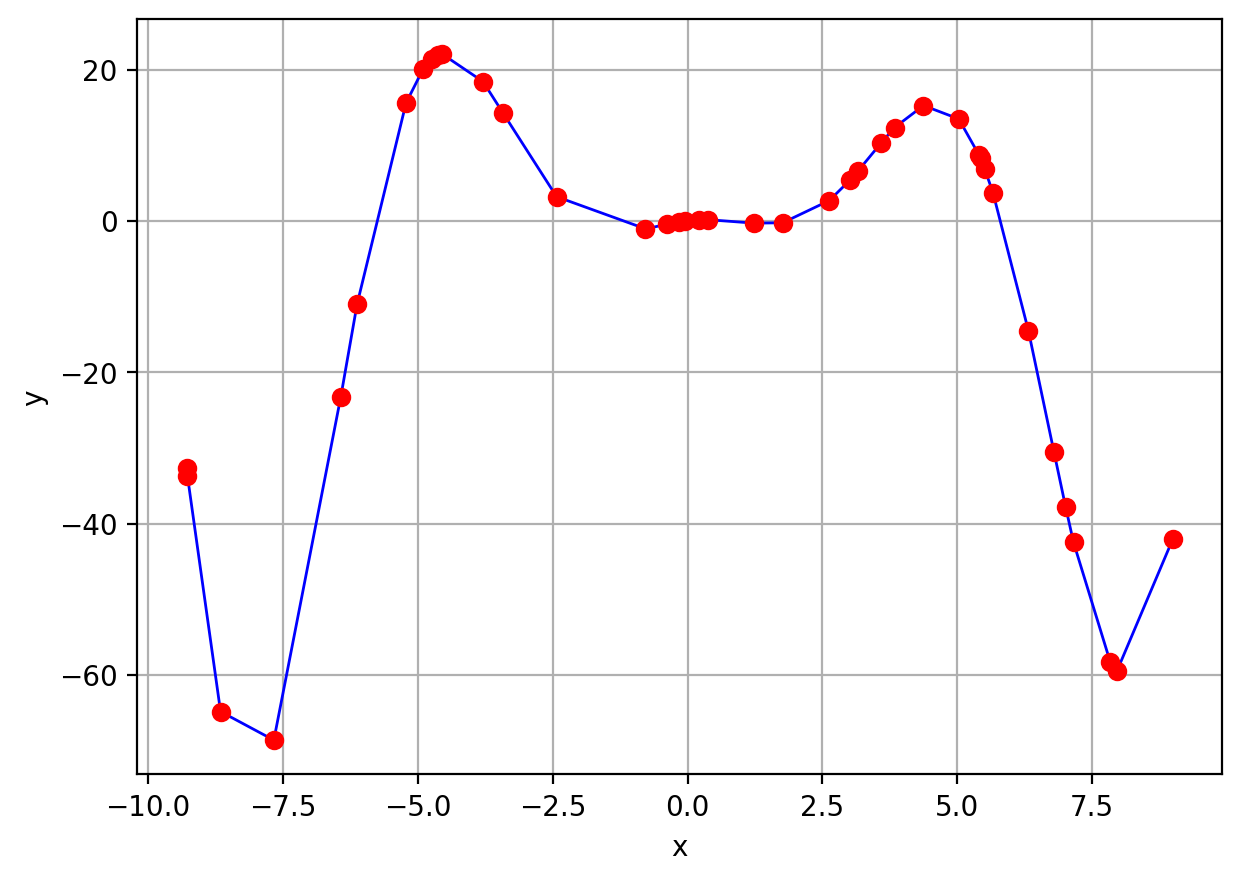

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from math import cos
from math import sin

f = open('lab1.csv', 'r')

points = [0] * 40

i=-1
for line in f:
    i=i+1
    points[i] = [0] * 2
    points[i][0]=(float(line[0:line.find(" ")]))
    points[i][1]=(float(line[line.find(" "):]))

points.sort()

y = [0] * 40
x = [0] * 40
for i in range(40):
    x[i] = points[i][0]
    y[i] = points[i][1]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), dpi=200)

axes.set_xlabel("x")
axes.set_ylabel("y")

axes.plot(x, y, color="blue", linewidth=1.0, linestyle="-")
axes.plot(x, y, "o", color="red")

axes.grid()


Самым простым вариантом аппроксимации в данном случае является полиномиальная аппроксимация. Для этого потребуется найти количество экстремумов n. Получив экстремумы можно посчитать степень полинома - n+1.
В нашем случае n=7.
Явная проблема такого метода - это то, что при большом количестве экстремумов степень полинома становится большой.

[-1.10681766e+09 -2.13624674e+00  2.22224563e+00  9.72093093e-02
 -5.51348903e-02 -1.27767880e-03 -6.26013079e-04  6.61346592e-06
  1.08748332e-05  1.10681766e+09]
Среднеквадратическая ошибка =  10.708805025328758


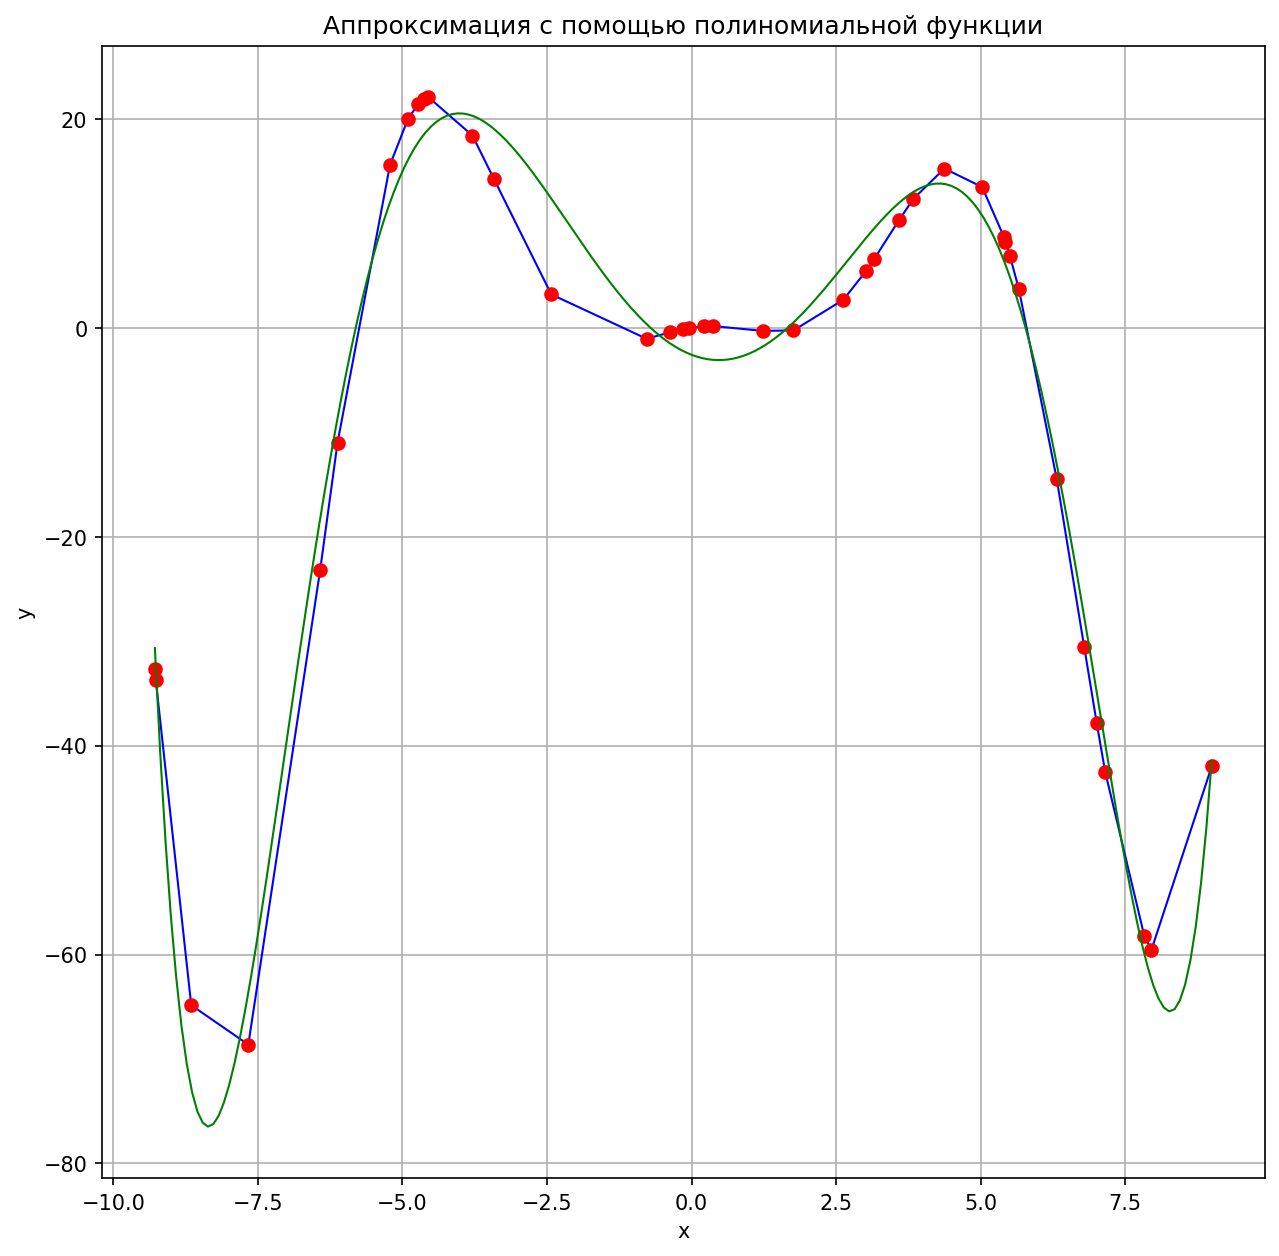

In [8]:
n=1
for  i in range(1, 39):
    if (y[i-1]<y[i]) and (y[i]>y[i+1]):
        n+=1
    if (y[i-1]>y[i]) and (y[i]<y[i+1]):
        n+=1
#print(n)


def f(x, a, b, c, d, e, f, g, h, l, m): #[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6], p0[7], p0[8]
    a_1 = [a, b, c, d, e, f, g, h, l, m]
    y = [0] * (len(x))
    for j in range(len(x)):
        y[j] = a_1[8+1]
        for i in range(8+1):
            y[j] += a_1[i]*x[j]**i
    return y

def dif(a, b):
    c=0
    for i in range(len(a)):
        c += (a[i] - b[i])**2
    return (c / (i+1))


#a = [1.] * (n+1)
a = opt.curve_fit(f, x, y)[0]
print(a)
print("Среднеквадратическая ошибка = ", dif(y, f(x, a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8], a[9])))

y_1 = [0]*200
x_1 = np.linspace(x[0],x[39],200,endpoint=True)
#a[7] = 0

y_1 = f(x_1, a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7], a[8], a[9])


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=150)

axes.set_title("Аппроксимация с помощью полиномиальной функции")

axes.set_xlabel("x")
axes.set_ylabel("y")

axes.plot(x, y, color="blue", linewidth=1.0, linestyle="-")
axes.plot(x, y, "o", color="red")
axes.plot(x_1, y_1, color="green", linewidth=1.0, linestyle="-")

axes.grid()

Другой вид аппроксимации, который можно применить - аппроксимация через тригонометрические функции. По распределению точек
можно понять, что они расположены симметрично оси параллельной ОУ и проходящей примерно через 0. Таким образом функция, 
которая аппроксимирует точки - чётная. Таким образом можно использовать: сложение косинуса и полинома чётной степени,
умножение косинуса на полином чётной степени или умножение синуса на полином нечётной степени.

Для сравнения с полиномиальной аппроксимацией используем такое же количество аппроксимируемых значений.

[ 3.32609455e+00 -1.05527235e+00 -6.32604508e+00  6.64831690e+00
 -6.55388513e+00  1.18331209e+00  3.61007846e-02 -1.34069606e-01
 -1.59200508e-04  1.07716113e-03]
Среднеквадратическая ошибка =  0.7356581762321532


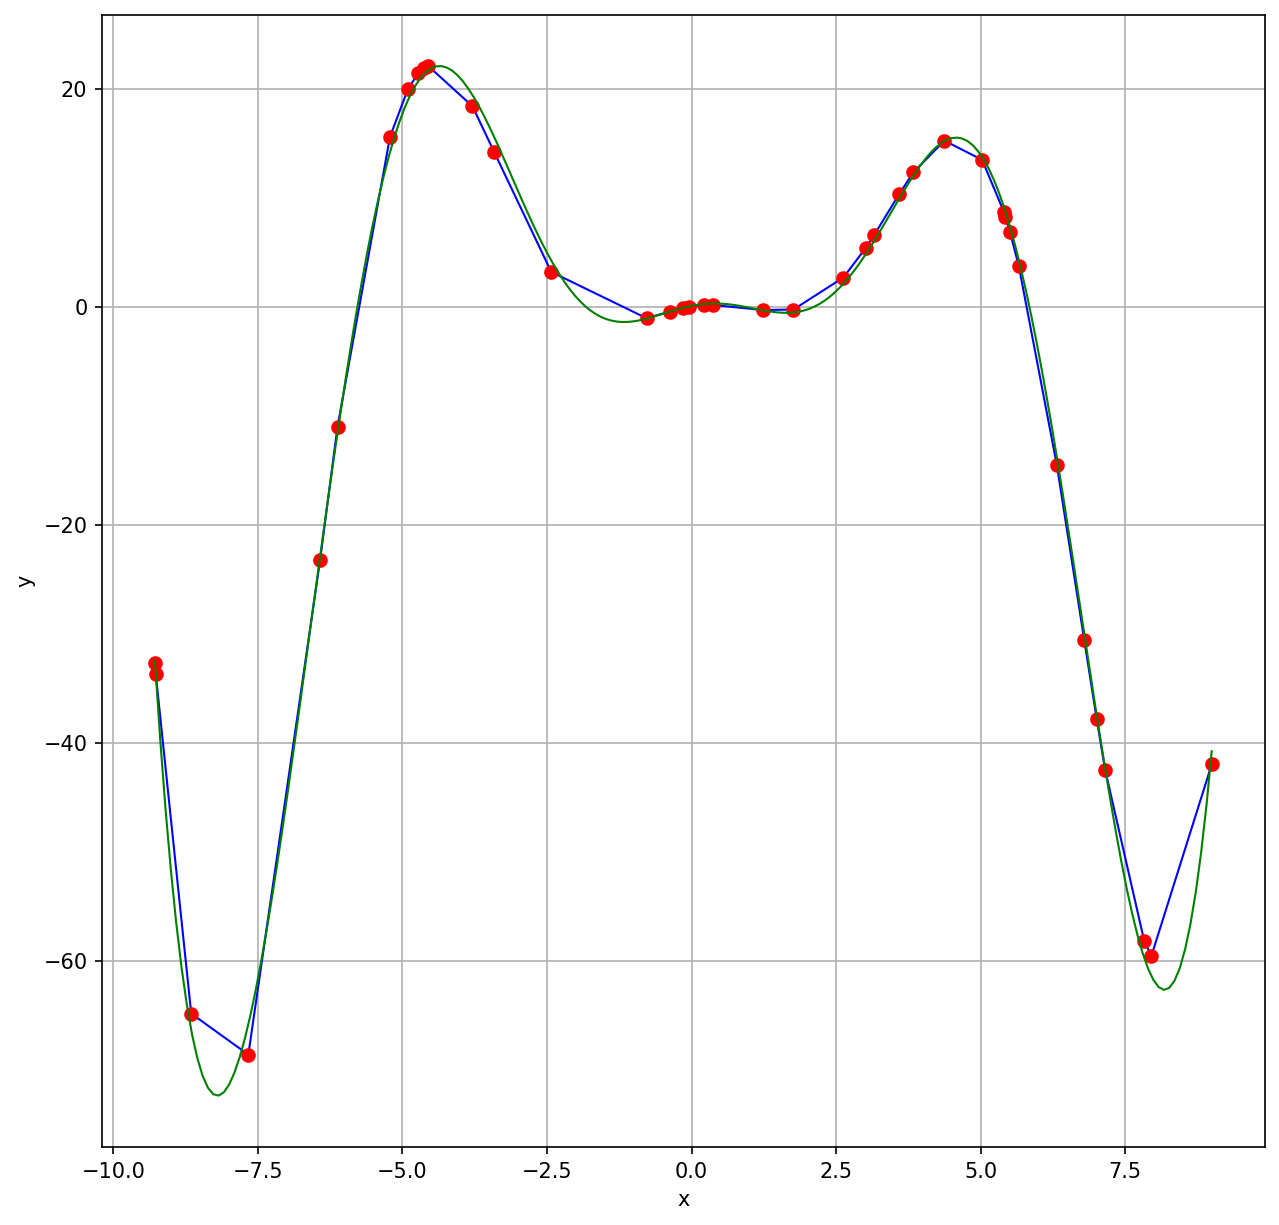

In [7]:
# sum of cos and polynome

def sum_func(x, a, b, c, d, e, f, g, h, l, m):
    y = [0] * (len(x))
    for j in range(len(x)):
        y[j] = (a*x[j]**2 + b*x[j] + c) + d*cos(e + f*x[j]) + g*x[j]**3 + h*x[j]**4 + l*x[j]**5 + m*x[j]**6
    return y

b = opt.curve_fit(sum_func, x, y)[0]    
print(b)
print("Среднеквадратическая ошибка = ", dif(y, sum_func(x, b[0], b[1], b[2], b[3], b[4], b[5], b[6], b[7], b[8], b[9])))

y_1 = sum_func(x_1, b[0], b[1], b[2], b[3], b[4], b[5], b[6], b[7], b[8], b[9])
        
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=150)

axes.set_xlabel("x")
axes.set_ylabel("y")

axes.plot(x, y, color="blue", linewidth=1.0, linestyle="-")
axes.plot(x, y, "o", color="red")
axes.plot(x_1, y_1, color="green", linewidth=1.0, linestyle="-")

axes.grid()

Как видно из квадратичной ошибки аппроксимирование через сумму гораздо точнее с тем же количеством аргументов, чем просто полиномиальное аппроксимироавние. 

Следующим проверим умножение косинуса на полином. Для равного количества аргументов добавим вторую тригонометрическую функцию. В процессе подбора получилось уравнение (a*x**2 + b*x + c) * cos(d + e*x) + (l*x**2 +f*x + g)*cos(h+k*x)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[-1.06000000e+00  8.50000006e-01 -2.02538282e-08 -4.00217275e-10
  8.10000000e-01 -5.30597194e-09  2.16892402e-08  1.02166181e+00
  1.08500847e+00  9.57874235e-10]
Среднеквадратическая ошибка =  2.5956979684514934e-16


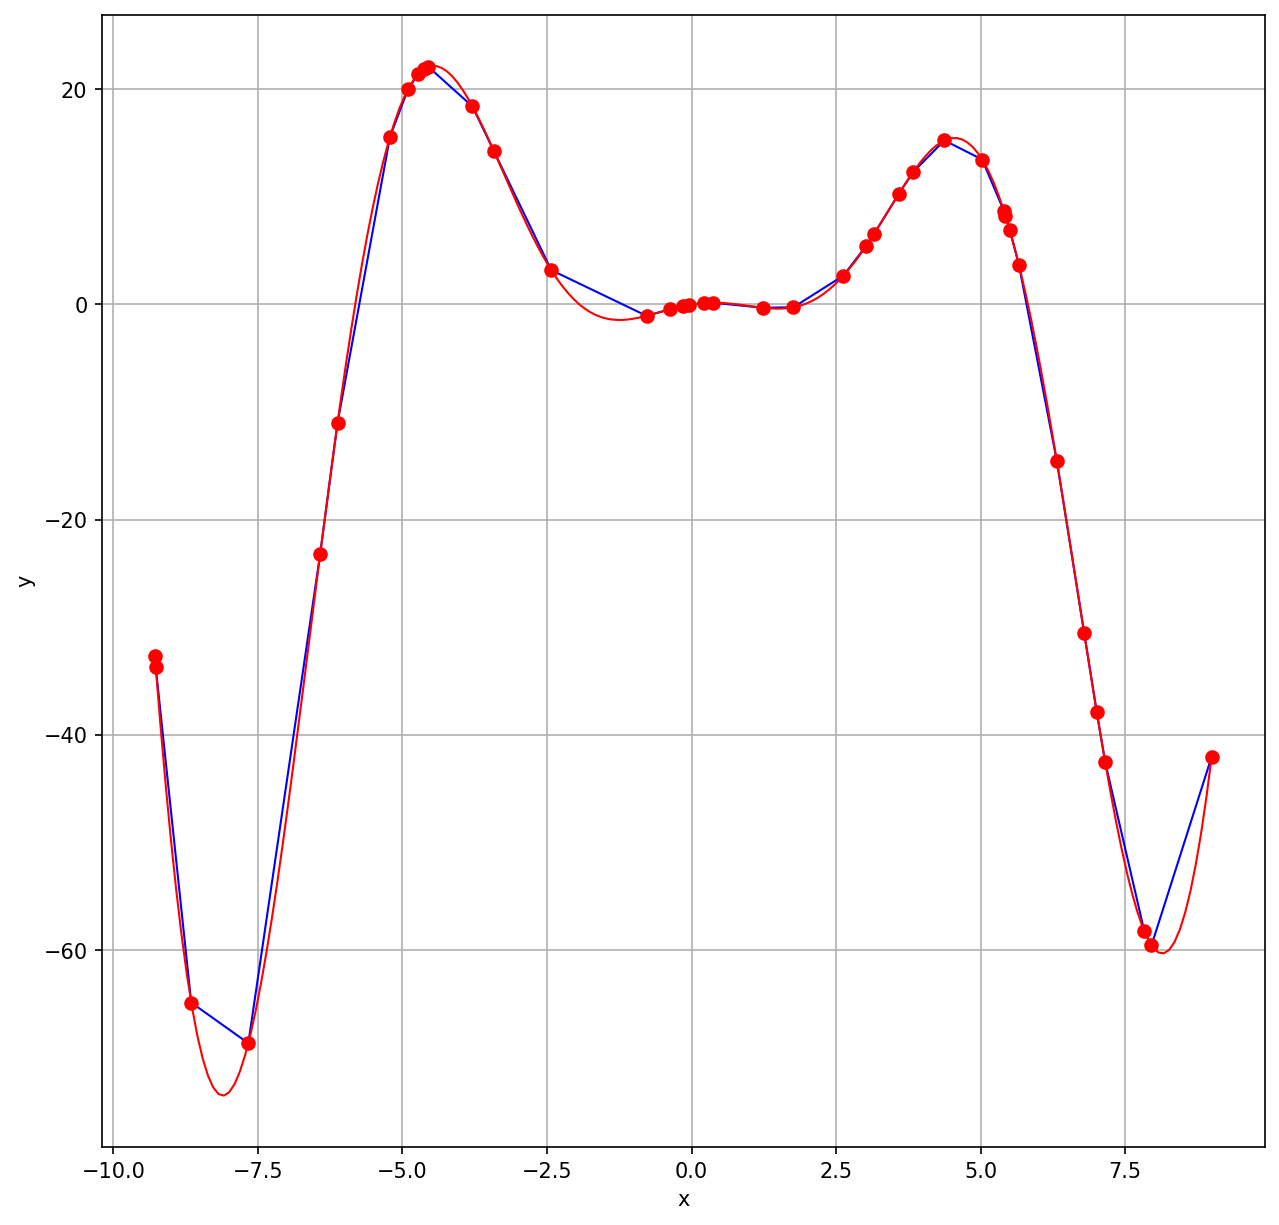

In [6]:
# multipling cos on polynome

def mul_func(x, a, b, c, d, e, f, g, h, k, l):
    y = [0] * (len(x))
    for j in range(len(x)):
        y[j] = (a*x[j]**2 + b*x[j] + c) * cos(d + e*x[j]) + (l*x[j]**2 +f*x[j] + g)*cos(h+k*x[j])
    return y

c = opt.curve_fit(mul_func, x, y)[0]    
print(c)
print("Среднеквадратическая ошибка = ", dif(y, mul_func(x, c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9])))


y_1 = mul_func(x_1, c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9])
        
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=150)

axes.set_xlabel("x")
axes.set_ylabel("y")

axes.plot(x, y, color="blue", linewidth=1.0, linestyle="-")
axes.plot(x, y, "o", color="red")
axes.plot(x_1, y_1, color="red", linewidth=1.0, linestyle="-")

axes.grid()

Эта функция выдаёт самый точный результат. Однако её можно оптимизировать ещё сильнее. Аргументы значения которых очень малы можно обнулить.

In [5]:
y_1 = mul_func(x_1, c[0], c[1], c[2], 0, c[4], 0, 0, c[7], c[8], 0)
print("Среднеквадратическая ошибка = ", dif(y, mul_func(x, c[0], c[1], 0, 0, c[4], 0, 0, c[7], c[8], 0)))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=150)

axes.set_xlabel("x")
axes.set_ylabel("y")

axes.plot(x, y, color="blue", linewidth=1.0, linestyle="-")
axes.plot(x, y, "o", color="red")
axes.plot(x_1, y_1, color="red", linewidth=1.0, linestyle="-")

axes.grid()

NameError: name 'mul_func' is not defined

Таким образом получается конечная функция f(x) = (-1.06*x**2 + 0.850000006*x) * cos(0.81*x)

Отчёт сделал Горошков Даниил РК6-61Б
